In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal, ndimage
from scipy.optimize import curve_fit

from config import props, filenames

In [2]:
current = pd.read_csv('/run/media/alo/0CD4823BD48226D4/Szewczyk/Data/2024-03-21/example_period.csv')
prc = pd.read_csv(filenames.data+'prc.csv')
prc['norm_response'] = prc.response/props.pert_strength
current.phase = current.phase/2
current_copy = current.copy()
current_copy.phase = current_copy.phase+0.5
current_copy.t = current_copy.t+current_copy.t.iloc[-1]
current = pd.concat([current, current_copy])

In [3]:
def gaussian(x, h, m, s):
    d = np.minimum(np.abs(x-m), 1-np.abs(x-m))
    return h*np.exp(-d**2/(2*s))

def curve(x, h1, m1, s1, h2, m2, s2):
    return gaussian(x, h1, m1, s1) + gaussian(x, h2, m2, s2)

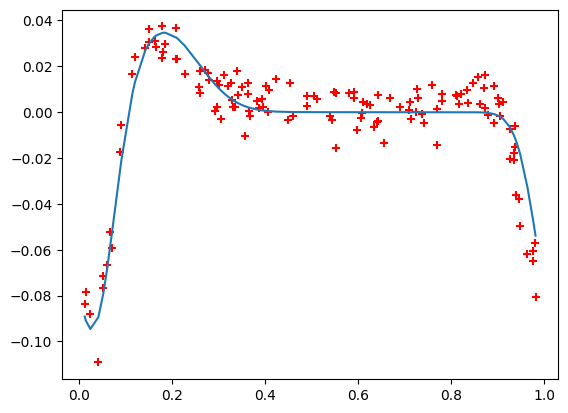

In [4]:
initial_guess = (0.035, 0.18, 0.006, -0.1, 0.03, 0.002)
plt.figure()
plt.plot(prc.phase, curve(prc.phase, *initial_guess))
plt.scatter(prc.phase, prc.norm_response, marker='+', c='r')

In [5]:
popt, popc = curve_fit(curve, prc.phase, prc.norm_response, initial_guess)

In [6]:
def fitted_prc(x):
    return curve(x%1, *popt)

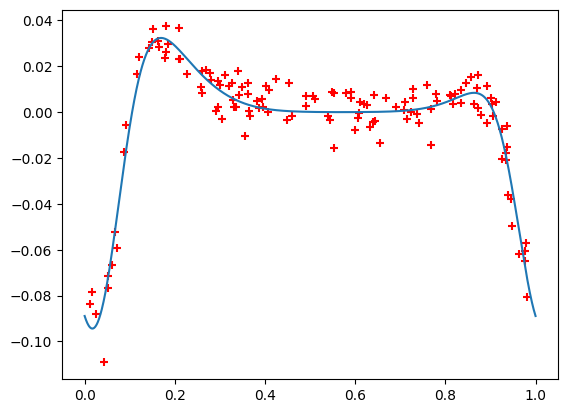

In [7]:
plt.scatter(prc.phase, prc.norm_response, marker='+', c='r')
plt.plot(np.linspace(0, 1, 1000), curve(np.linspace(0, 1, 1000), *popt), zorder=10)

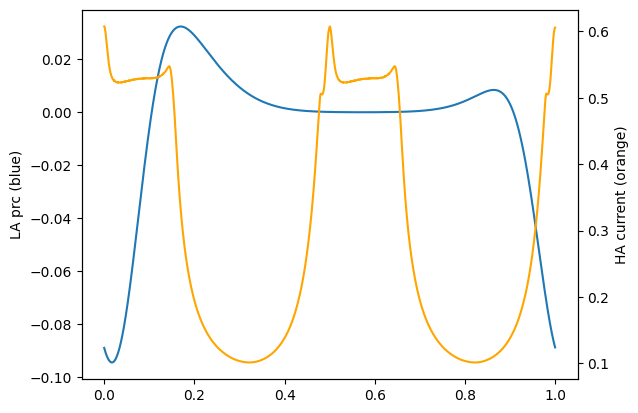

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(current.phase, fitted_prc(current.phase))
ax1.set_ylabel('LA prc (blue)')
ax2.plot(current.phase, current.I, c='orange')
ax2.set_ylabel('HA current (orange)')
plt.show()

In [9]:
effect = np.zeros(1000)
for i, d in enumerate(np.arange(-0.5, 0.5, 0.001)):
    effect[i] = np.sum(-fitted_prc(np.array(current.phase+d)%1) * current.I)/1000

Text(0, 0.5, 'phase change per second')

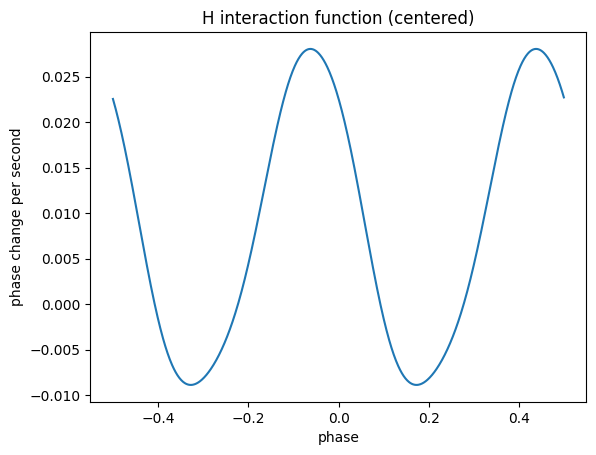

In [14]:
plt.plot(np.arange(-0.5, 0.5, 0.001), effect)
plt.title("H interaction function (centered)")
plt.xlabel("phase")
plt.ylabel("phase change per second")

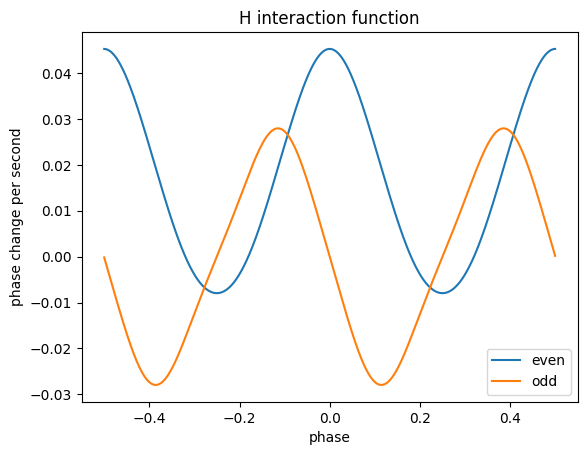

In [15]:
plt.plot(np.arange(-0.5, 0.5, 0.001), effect + effect[::-1], label="even")
plt.plot(np.arange(-0.5, 0.5, 0.001), effect-effect[::-1], label="odd")
plt.title("H interaction function")
plt.xlabel("phase")
plt.ylabel("phase change per second")
plt.legend()